In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Build model with model_architecture.json

In [3]:
import os
import json

with open('../Server/model_architecture.json','r') as file:
    json_data = file.read()
model_architecture = json.loads(json_data)
model = tf.keras.models.model_from_json(model_architecture)
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy","categorical_accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0

# Load full CIFAR10 dataset

In [4]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Shape:")
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)
print('Example of dataset')
print(x_train.view)


# Flatten label
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print(y_train.shape, y_test.shape)

Shape:
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Example of dataset
<built-in method view of numpy.ndarray object at 0x000002228285CDB0>
(50000,) (10000,)


## Visualize data samples

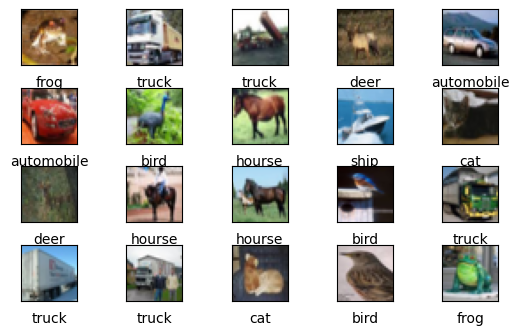

<Figure size 3000x3000 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'hourse', 'ship', 'truck']

def plot_categories(x_train, y_train):
  plt.figure(figsize=(30,30))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

plot_categories(x_train, y_train)

## Training model

In [6]:
model_history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 19s 10ms/step - loss: 1.6148 - accuracy: 0.4297 - categorical_accuracy: 0.0969 - val_loss: 1.2517 - val_accuracy: 0.5516 - val_categorical_accuracy: 0.0817
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1891 - accuracy: 0.5793 - categorical_accuracy: 0.1000 - val_loss: 1.0385 - val_accuracy: 0.6344 - val_categorical_accuracy: 0.1186
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9998 - accuracy: 0.6495 - categorical_accuracy: 0.0980 - val_loss: 0.9638 - val_accuracy: 0.6643 - val_categorical_accuracy: 0.1370
Epoch 4/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8885 - accuracy: 0.6911 - categorical_accuracy: 0.0992 - val_loss: 0.8447 - val_accuracy: 0.7065 - val_categorical_accuracy: 0.0977
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8105 - accuracy: 0.7177 - categorical_accuracy: 0.1006 - val_loss: 0.7491 - 

## Eveluation the model

In [7]:
loss, accuracy, categorical_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('\nModel Test accuracy:', accuracy)
print('\nModel Test loss:', loss)

313/313 - 1s - loss: 0.6981 - accuracy: 0.7630 - categorical_accuracy: 0.1119 - 1s/epoch - 3ms/step

Model Test accuracy: 0.7630000114440918

Model Test loss: 0.6980924010276794


## Predict and plot the confussion matrix

313/313 [==============================] - 1s 2ms/step


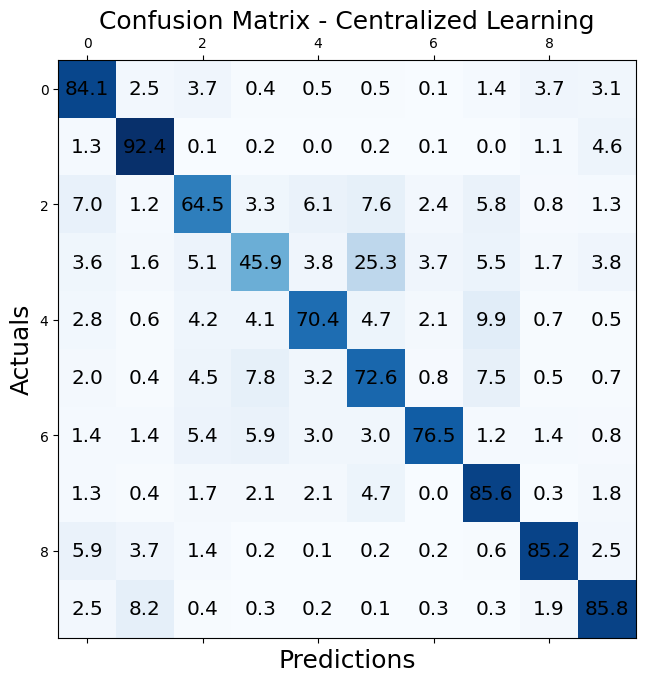

In [8]:
predictions = model.predict(x_test)
model_preds = predictions.argmax(axis=1)
confusion  = tf.math.confusion_matrix(
    labels=y_test,
    predictions=model_preds,
    num_classes=10    
)
conf_matrix = np.array(confusion)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j]/10, va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Centralized Learning', fontsize=18)
plt.show()        
plt.show()

## Plot the loss and accuracy

[0.5515999794006348, 0.6344000101089478, 0.6643000245094299, 0.7064999938011169, 0.737500011920929, 0.7348999977111816, 0.7601000070571899, 0.7578999996185303, 0.7688999772071838, 0.7670999765396118] [1.2517105340957642, 1.0385438203811646, 0.9638365507125854, 0.8447146415710449, 0.7490534782409668, 0.7646190524101257, 0.6935003399848938, 0.700141966342926, 0.687888503074646, 0.6860923767089844]


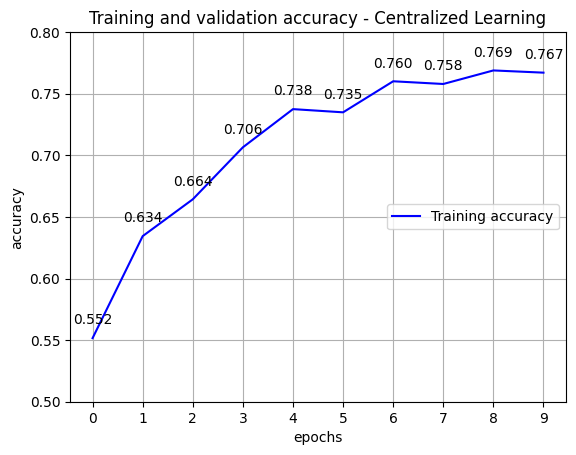

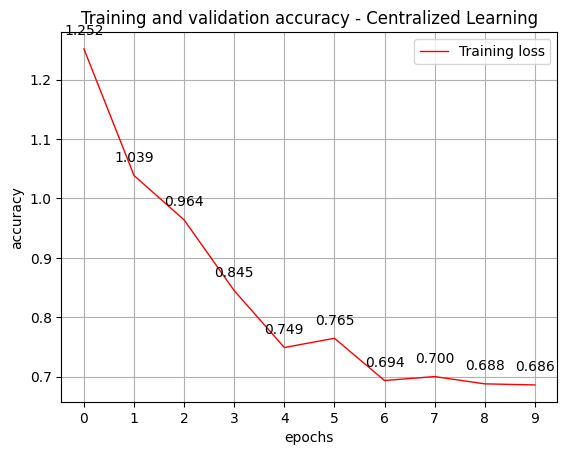

In [9]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# categorical_acc = model_history.history['categorical_accuracy']
print(val_acc, val_loss)

epochs = range(len(acc))
plt.grid()
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Training accuracy')
# plt.plot(epochs, loss, 'r', linestyle='dashed', linewidth=1, label='Training loss')
# plt.plot(epochs, val_loss, 'r', linestyle='dashed',linewidth=1,label='Validation loss')
plt.yticks(np.arange(0.5, 0.8, step=0.05))
plt.title('Training and validation accuracy - Centralized Learning')
plt.xlabel('epochs')
plt.xticks(epochs)
plt.ylabel('accuracy')
plt.legend(loc=5)
for x,y in zip(epochs,val_acc):
    label = "{:.3f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
plt.show()

plt.grid()
plt.plot(epochs, val_loss, 'r',linewidth=1,label='Training loss')
plt.title('Training and validation accuracy - Centralized Learning')
plt.xlabel('epochs')
plt.xticks(epochs)
plt.ylabel('accuracy')
plt.legend(loc=0)
for x,y in zip(epochs,val_loss):
    label = "{:.3f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
plt.show()